In [1]:
import pandas as pd
import dask.dataframe as dd

In [2]:
# Cargar datasets
business_df = pd.read_pickle('/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/notebooks_yelp/bussines_pkl/business_listo_para_usar.pkl')

In [3]:
checkin_df = pd.read_json('/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/notebooks_yelp/checkin_json/checkin.json', lines=True)

In [4]:
# Cargar los datos de review en partes utilizando Dask
review_df = dd.read_parquet('/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/notebooks_yelp/review_json_yelp/review_listo_para_usar.parquet')

In [ ]:
#hemos probado con la celda anterior, para que no ocupe tanto lugar en la memoria.. a este codigo no lo ejecutamos por el momento y lo dejamos para despues
#review_df = pd.read_parquet('/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/notebooks_yelp/review_json_yelp/review_crudo.parquet')

In [5]:
tip_df = pd.read_json('/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/notebooks_yelp/tip_json/df_tip_listo_para_usar.json', lines=True)

In [6]:
# Cargar los datos de user en partes utilizando Dask
user_df = dd.read_parquet('/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/notebooks_yelp/user_parquet_yelp/user_yelp_listo_para_usar.parquet')

In [ ]:
#mismo caso que dos celdas mas arriba: hemos probado con la celda anterior, para que no ocupe tanto lugar en la memoria.. a este codigo no lo ejecutamos por el momento y lo dejamos para despues

#user_df = pd.read_parquet('/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/notebooks_yelp/user_parquet_yelp/user.parquet')

In [8]:
# Dimensión Negocios (dim_business)
dim_business = business_df[['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'categories',]]
dim_business.to_csv('/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/archivos_csv_para_mysql/dim_business.csv', index=False)

In [9]:
# Hechos de Negocios (fact_business)
fact_business = business_df[['business_id', 'stars', 'review_count', 'is_open']]
fact_business.to_csv('/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/archivos_csv_para_mysql/fact_business.csv', index=False)

In [10]:
# Hechos de Check-in (fact_checkin)
fact_checkin = checkin_df[['business_id', 'date']]
fact_checkin.to_csv('/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/archivos_csv_para_mysql/fact_checkin.csv', index=False)

In [11]:
# Dimensión Reseñas (dim_review)
dim_review = review_df[['review_id', 'text', 'date']]
dim_review.to_csv('/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/archivos_csv_para_mysql/dim_review.csv', index=False)

['/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/notebooks_yelp/dim_review.csv/0.part',
 '/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/notebooks_yelp/dim_review.csv/1.part',
 '/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/notebooks_yelp/dim_review.csv/2.part',
 '/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/notebooks_yelp/dim_review.csv/3.part',
 '/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/notebooks_yelp/dim_review.csv/4.part',
 '/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/notebooks_yelp/dim_review.csv/5.part',
 '/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/notebooks_yelp/dim_review.csv/6.part']

<div style="border:1px solid yellow; padding:10px; width:90%">




### <p style='color:lime'><u>Manera de trabajar los archivos dask: </u></p>

Como dask <u>separa los archivos en varias partes</u> para procesarlos de manera más eficiente, los mismos se guardan por separado para trabajar con ellos se pueden leer  todo a la vez o unirlos en uno solo, tal es el caso de la celda que sigue(1), para leerlos;    
y la otra celda, a la que le hemos colocado el 2), donde se pueden guardar todos directamente en un solo csv, analizando siempre que la pc no explote.. 

</div>

In [ ]:
# 1)Leer todos los archivos CSV a la vez con Dask
dim_review = dd.read_csv('/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/notebooks_yelp/dim_review.csv/*.part')

In [ ]:
# 2)Guardar el DataFrame en un solo archivo CSV
dim_review.to_csv('dim_review.csv', index=False, single_file=True)

In [13]:
# Hechos de Reseñas (fact_review)
fact_review = review_df[['review_id', 'user_id', 'business_id', 'stars']]
fact_review.to_csv('/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/archivos_csv_para_mysql/fact_review.csv', index=False)

['/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/notebooks_yelp/fact_review.csv/0.part',
 '/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/notebooks_yelp/fact_review.csv/1.part',
 '/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/notebooks_yelp/fact_review.csv/2.part',
 '/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/notebooks_yelp/fact_review.csv/3.part',
 '/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/notebooks_yelp/fact_review.csv/4.part',
 '/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/notebooks_yelp/fact_review.csv/5.part',
 '/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/notebooks_yelp/fact_review.csv/6.part']

In [15]:
# Hechos de Tips (fact_tip)
fact_tip = tip_df[['user_id', 'business_id', 'text', 'date', 'compliment_count']]
fact_tip.to_csv('/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/archivos_csv_para_mysql/fact_tip.csv', index=False)

In [16]:
# Dimensión Usuarios (dim_user)
dim_user = user_df[['user_id', 'name']]
dim_user.to_csv('/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/archivos_csv_para_mysql/dim_user.csv', index=False)

['/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/archivos_csv_para_mysql/dim_user.csv/0.part']

In [18]:
# Hechos de Usuarios (fact_user)
fact_user = user_df[['user_id', 'review_count']]
fact_user.to_csv('/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/archivos_csv_para_mysql/fact_user.csv', index=False)

['/Users/luisalbertocerelli/Desktop/00-Todo/Data_Science/01-Full_Time/TPFINAL/Yelp/archivos_csv_para_mysql/fact_user.csv/0.part']

In [19]:
print("Transformación completada y archivos CSV generados.")


Transformación completada y archivos CSV generados.


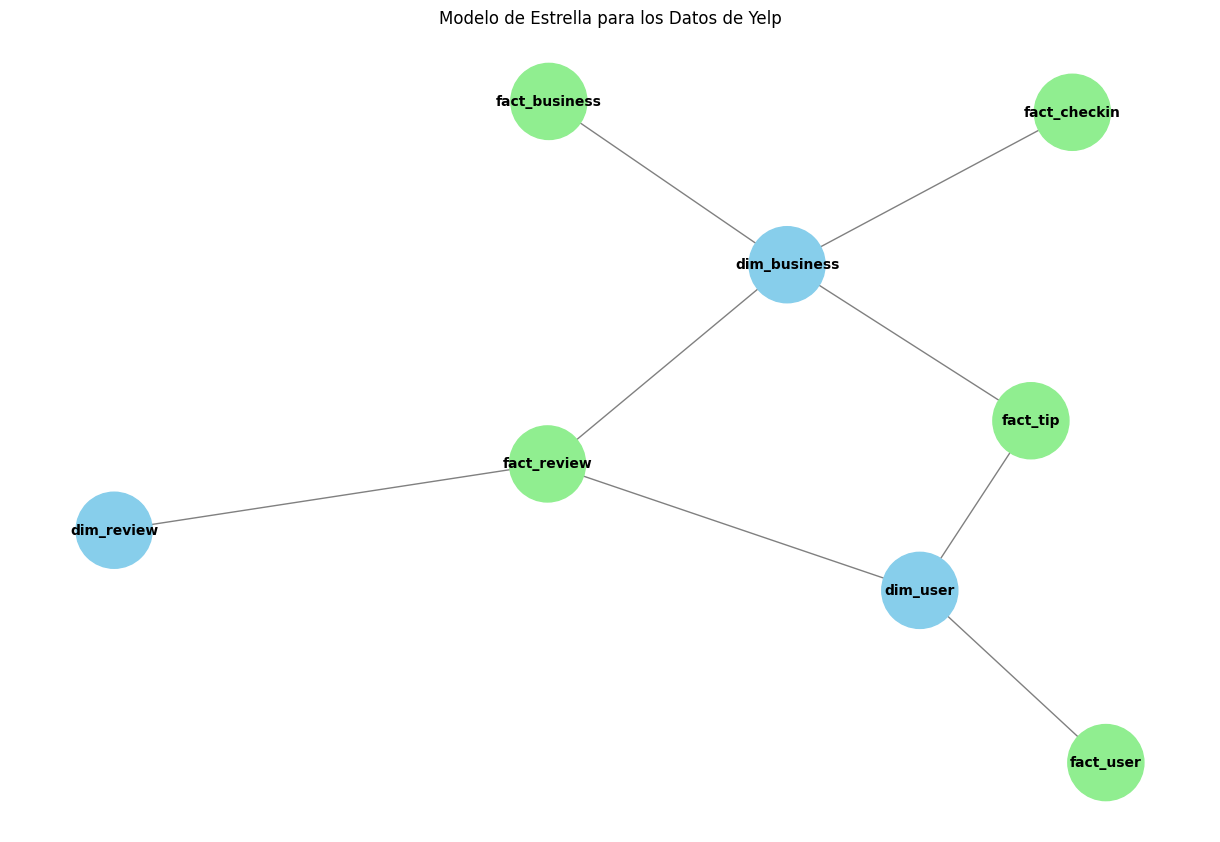

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos de dimensiones
dim_nodes = ['dim_business', 'dim_user', 'dim_review']
G.add_nodes_from(dim_nodes, color='skyblue', style='filled')

# Agregar nodos de hechos
fact_nodes = ['fact_business', 'fact_checkin', 'fact_review', 'fact_tip', 'fact_user']
G.add_nodes_from(fact_nodes, color='lightgreen', style='filled')

# Agregar aristas entre nodos de dimensiones y hechos
edges = [
    ('dim_business', 'fact_business'),
    ('dim_business', 'fact_checkin'),
    ('dim_business', 'fact_review'),
    ('dim_business', 'fact_tip'),
    ('dim_user', 'fact_review'),
    ('dim_user', 'fact_tip'),
    ('dim_user', 'fact_user'),
    ('dim_review', 'fact_review')
]
G.add_edges_from(edges)

# Obtener colores y estilos de los nodos
colors = [G.nodes[node]['color'] for node in G.nodes]
styles = [G.nodes[node]['style'] for node in G.nodes]

# Dibujar el grafo
pos = nx.spring_layout(G, seed=42)  # Posición de los nodos
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=3000, font_size=10, font_weight='bold', edge_color='gray')
plt.title('Modelo de Estrella para los Datos de Yelp')
plt.show()
